In [12]:
import pandas as pd
import SquareData
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./board_states_trimmed_shuffled.csv')

In [4]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,b1,b2,...,g7,g8,h1,h2,h3,h4,h5,h6,h7,h8
0,wr,wp,x,wb,x,bp,x,br,wn,wp,...,bp,x,wk,bb,x,bq,x,x,bp,br
1,wr,x,wp,x,x,x,bp,x,x,wp,...,bb,x,wr,x,x,x,x,x,bp,br
2,x,wp,x,x,x,x,bp,x,x,wp,...,bp,bk,x,wp,x,x,x,x,bp,x
3,wr,x,x,wp,x,x,bp,x,x,x,...,x,x,x,wp,bb,x,bp,x,x,x
4,wr,wp,x,x,x,bp,x,x,x,wp,...,bp,x,x,wp,x,x,x,x,bp,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499995,x,wp,x,x,x,x,bp,x,x,wp,...,x,bk,x,x,x,bq,x,x,bp,x
6499996,wr,wp,x,x,x,x,bp,br,wn,wp,...,bp,x,wr,wp,x,x,x,x,bp,br
6499997,wr,wp,x,x,bp,x,x,br,x,wp,...,bp,x,wk,wp,x,x,x,x,bp,br
6499998,x,x,wp,x,x,x,bp,br,x,wb,...,x,bk,x,x,wb,x,bb,bp,x,x


In [5]:
occurrences_dict = { square: {occupant: 0 for occupant in SquareData.occupants} for square in SquareData.squares }

In [7]:
for square in SquareData.squares:
    for occupant in SquareData.occupants:
        occurrences_dict[square][occupant] += (df[square] == occupant).sum()

In [8]:
square_occupant_counts = pd.DataFrame(occurrences_dict)
square_occupant_counts.to_csv('./square_occupant_counts.csv')

In [9]:
square_occupant_counts

,a1,a2,a3,a4,a5,a6,a7,a8,b1,b2,...,g7,g8,h1,h2,h3,h4,h5,h6,h7,h8
wk,19894,17212,10391,7055,6280,4778,3471,1262,157389,42124,...,6332,2390,325945,223830,48171,19123,11887,7204,4277,1464
bk,1674,4489,5687,6420,7765,9977,16603,16080,2449,7402,...,355638,2569460,1411,3382,6290,10609,17516,49680,190523,281903
wq,11137,8057,13496,42955,11361,13247,14946,11066,17843,28594,...,11526,7500,2559,7037,27088,37565,45189,29041,14825,11054
bq,12967,17623,15299,13331,88731,15627,13034,13940,9701,25411,...,28345,4708,9295,9608,19582,39510,32007,19100,5869,3010
wr,2501273,23249,19811,17706,20735,28575,54769,19331,245964,26010,...,23111,9617,1260924,16174,26466,16710,14967,17280,25821,12251
br,21388,55616,29669,21422,17450,19726,28258,2668058,17358,54957,...,29437,124219,11543,23556,15033,15015,15701,18002,15525,1354109
wn,1834,6623,34142,47156,12090,4890,4139,5292,465881,7722,...,5117,1045,2747,33950,29202,51004,17105,7549,3903,2617
bn,3878,4424,5061,12798,51410,44173,7485,2487,1346,8756,...,21584,279401,1833,2668,6431,13754,69420,35129,29777,2522
wb,13180,26869,51969,19515,10375,14524,7906,4163,47784,330198,...,12849,3082,11886,34280,39278,56958,16704,44211,9128,2566
bb,4367,8172,14562,12028,16494,73025,19585,16101,3863,17249,...,927356,5330,2399,6680,28778,18839,43868,42659,22006,16765


Square a1: [19894, 1674, 11137, 12967, 2501273, 21388, 1834, 3878, 13180, 4367, 3908408, 0, 0]


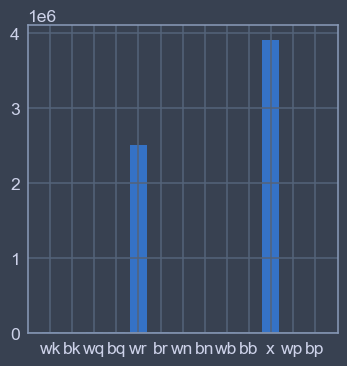

Square a2: [17212, 4489, 8057, 17623, 23249, 55616, 6623, 4424, 26869, 8172, 2763256, 3546187, 18223]


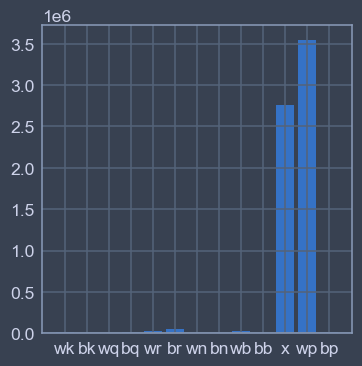

Square a3: [10391, 5687, 13496, 15299, 19811, 29669, 34142, 5061, 51969, 14562, 5387874, 856465, 55574]


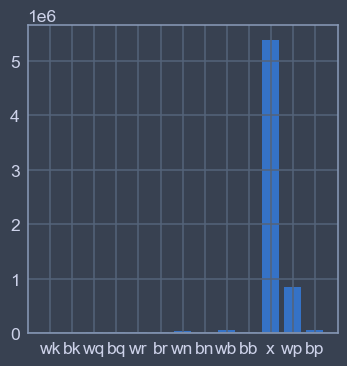

Square a4: [7055, 6420, 42955, 13331, 17706, 21422, 47156, 12798, 19515, 12028, 5590914, 552488, 156212]


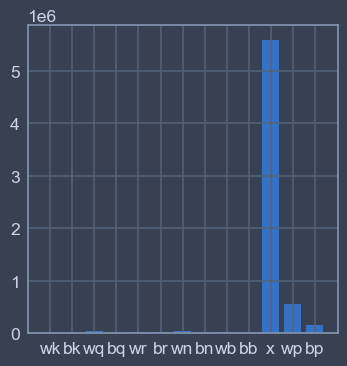

Square a5: [6280, 7765, 11361, 88731, 20735, 17450, 12090, 51410, 10375, 16494, 5565754, 153913, 537642]


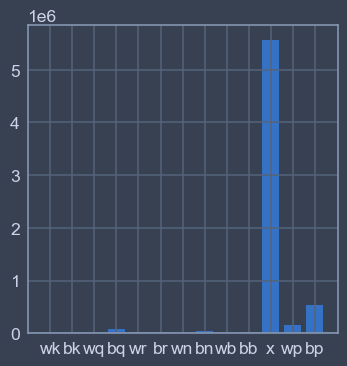

Square a6: [4778, 9977, 13247, 15627, 28575, 19726, 4890, 44173, 14524, 73025, 5013807, 47511, 1210140]


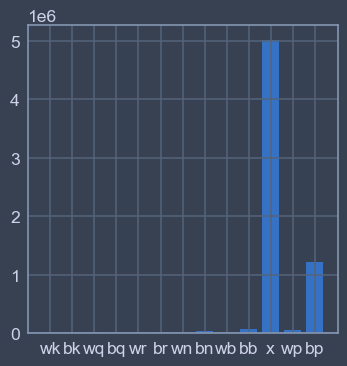

Square a7: [3471, 16603, 14946, 13034, 54769, 28258, 4139, 7485, 7906, 19585, 3112252, 16976, 3200576]


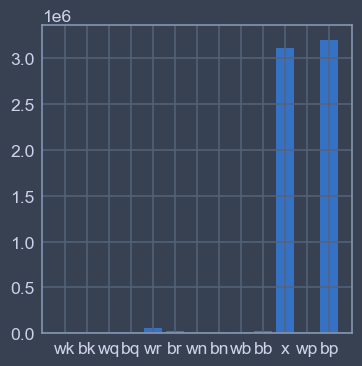

Square a8: [1262, 16080, 11066, 13940, 19331, 2668058, 5292, 2487, 4163, 16101, 3742220, 0, 0]


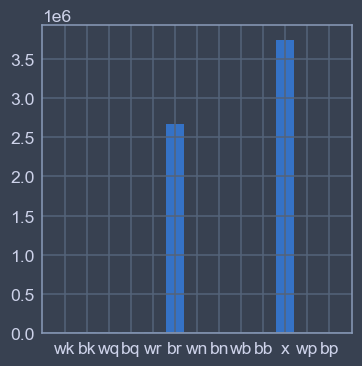

Square b1: [157389, 2449, 17843, 9701, 245964, 17358, 465881, 1346, 47784, 3863, 5530422, 0, 0]


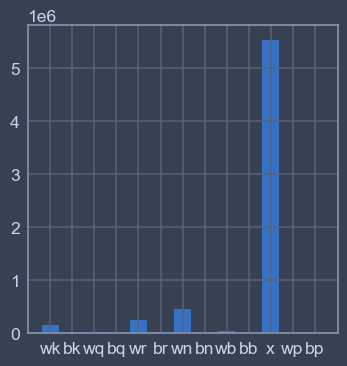

Square b2: [42124, 7402, 28594, 25411, 26010, 54957, 7722, 8756, 330198, 17249, 2888380, 3045824, 17373]


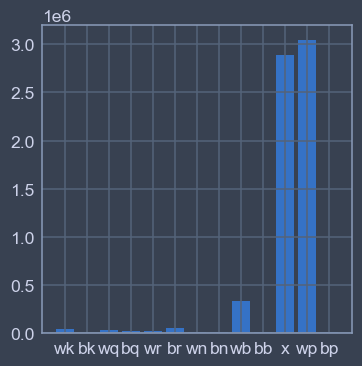

Square b3: [26616, 11268, 120200, 12027, 24130, 25835, 104423, 13420, 139201, 13971, 4967257, 998408, 43244]


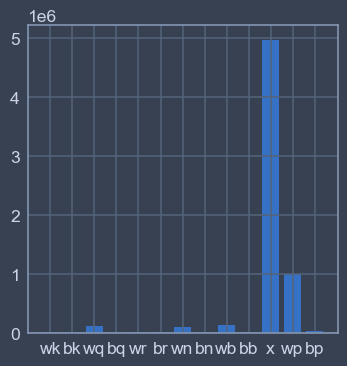

Square b4: [16545, 14673, 17854, 23103, 17004, 24730, 12155, 58639, 25416, 93494, 5460367, 486459, 249561]


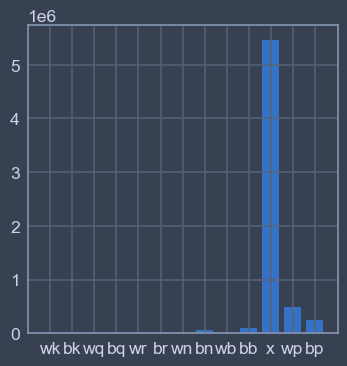

Square b5: [14017, 16813, 18564, 18556, 21246, 17138, 66127, 12764, 88595, 32448, 5378665, 183975, 631092]


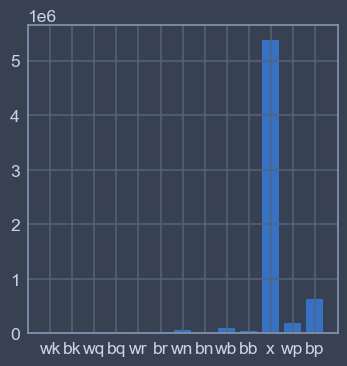

Square b6: [10037, 29109, 11922, 163713, 26883, 23162, 15960, 132382, 18952, 72908, 5025713, 37981, 931278]


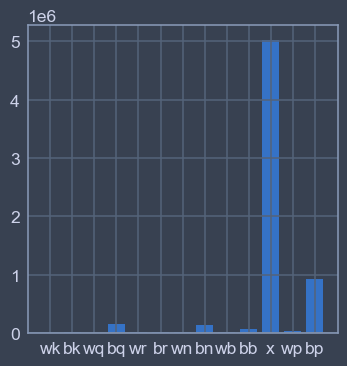

Square b7: [5857, 37305, 21187, 38545, 55402, 30155, 8008, 9128, 15044, 444939, 3011350, 17143, 2805937]


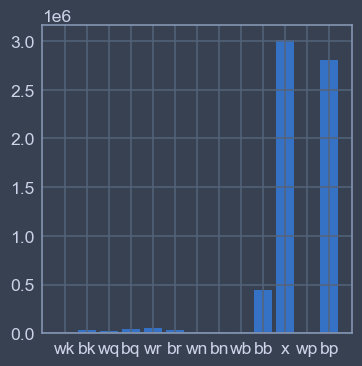

Square b8: [2148, 90156, 9571, 27194, 16445, 283149, 1637, 588903, 3556, 18121, 5459120, 0, 0]


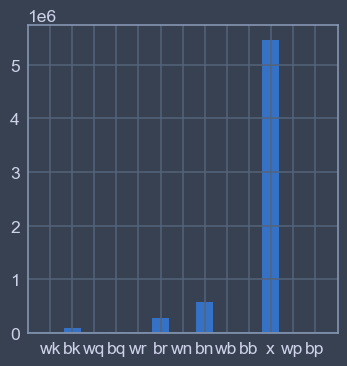

Square c1: [272083, 2023, 40828, 11190, 444938, 20455, 11945, 3321, 958665, 4837, 4729715, 0, 0]


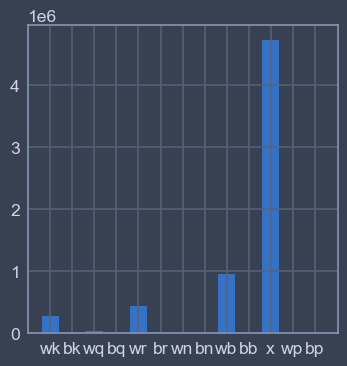

Square c2: [63864, 6737, 271405, 15470, 56723, 49202, 31282, 12163, 110598, 11206, 4458498, 1398113, 14739]


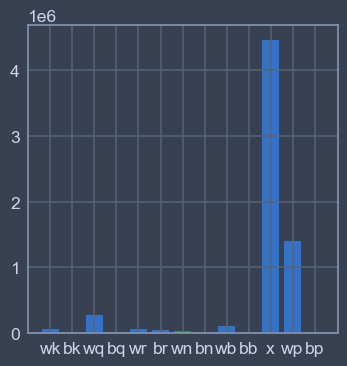

Square c3: [39037, 11348, 48594, 20823, 30931, 31050, 1060836, 25833, 82430, 31254, 3899000, 1169453, 49411]


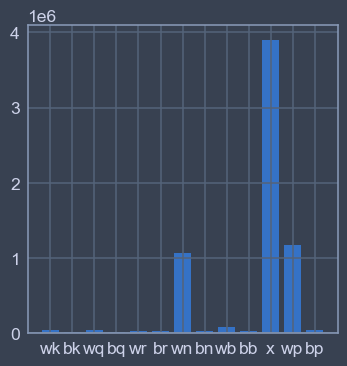

Square c4: [26476, 17356, 39741, 19812, 22968, 33956, 80958, 59118, 223460, 38932, 4636194, 1027089, 273940]


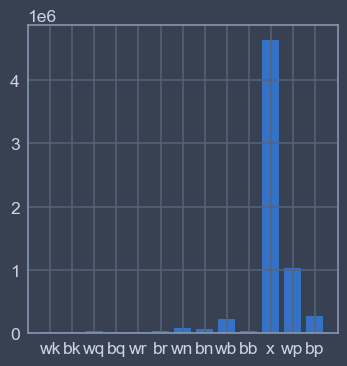

Square c5: [17336, 27970, 18688, 42944, 27876, 27134, 53441, 104943, 39987, 151028, 4760973, 263077, 964603]


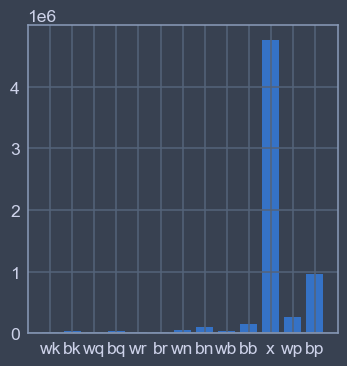

Square c6: [10890, 42423, 18867, 51604, 29892, 33255, 29979, 803002, 30454, 108545, 4103100, 48428, 1189561]


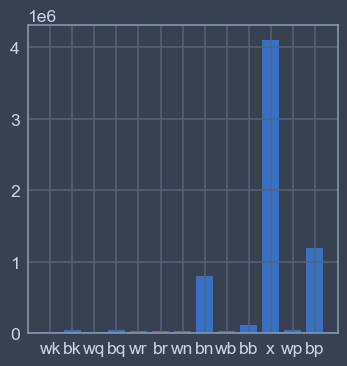

Square c7: [5402, 70705, 14756, 363037, 49772, 57045, 14669, 42038, 11564, 53405, 4712765, 15335, 1089507]


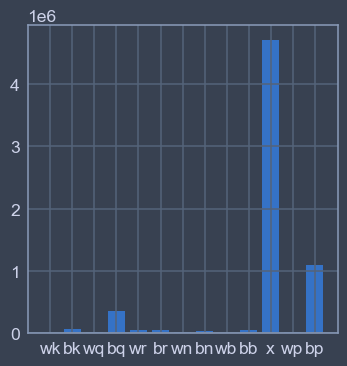

Square c8: [1991, 202604, 10647, 52436, 20058, 481886, 3796, 12895, 4456, 1166541, 4542690, 0, 0]


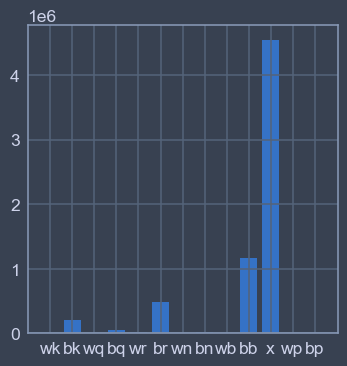

Square d1: [40315, 1718, 1335404, 13293, 803080, 23245, 23514, 3539, 22675, 4793, 4228424, 0, 0]


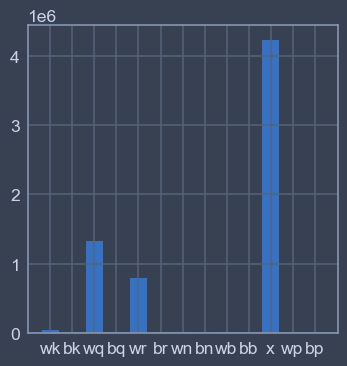

Square d2: [82565, 5112, 319374, 13884, 94002, 41694, 403042, 10603, 222555, 8727, 5104747, 178017, 15678]


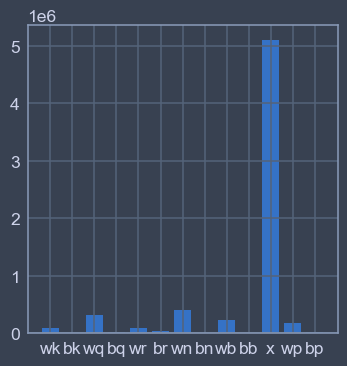

Square d3: [68676, 10868, 149636, 15376, 51387, 28502, 45308, 36943, 543207, 25913, 4821023, 648148, 55013]


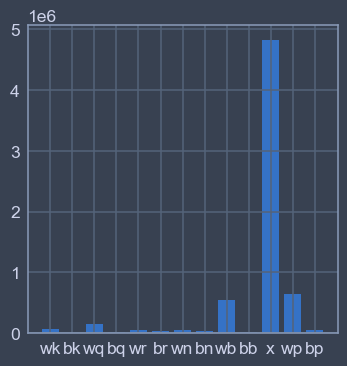

Square d4: [35524, 19713, 55257, 35121, 36052, 30124, 181936, 83385, 76610, 66577, 3959377, 1546739, 373585]


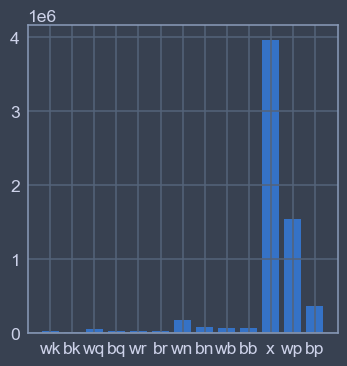

Square d5: [18916, 34447, 34571, 52748, 33052, 33808, 92136, 170214, 61153, 68901, 3941802, 595577, 1362675]


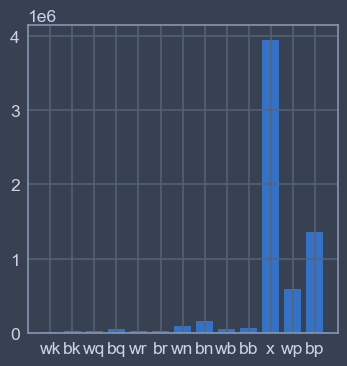

Square d6: [10949, 67629, 20259, 103179, 37710, 39284, 48617, 43449, 35723, 294003, 4584913, 75789, 1138496]


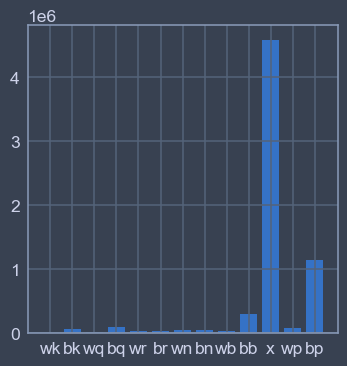

Square d7: [5330, 94463, 13898, 202848, 47484, 80119, 12399, 555050, 9001, 296051, 4912875, 18912, 251570]


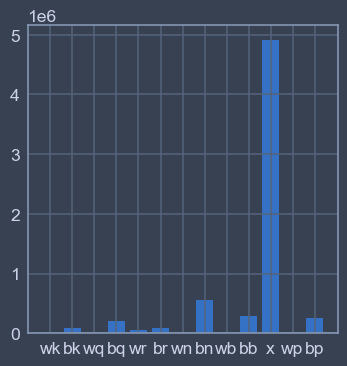

Square d8: [1683, 50103, 14007, 1488035, 24624, 621469, 3635, 19549, 5554, 25939, 4245402, 0, 0]


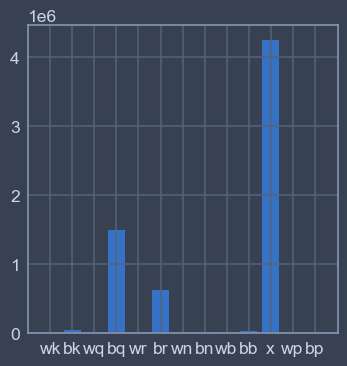

Square e1: [931910, 1889, 47637, 11615, 807912, 19375, 29749, 3237, 20934, 4335, 4621407, 0, 0]


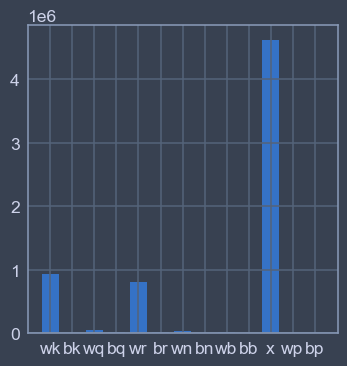

Square e2: [123268, 4781, 323165, 13209, 87572, 32011, 257706, 11444, 448179, 10032, 4848944, 327720, 11969]


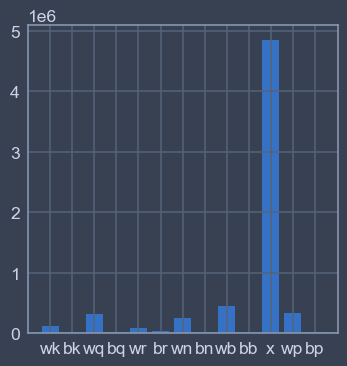

Square e3: [89856, 11483, 84370, 21192, 55335, 23037, 64658, 26345, 460866, 22818, 4663142, 929046, 47852]


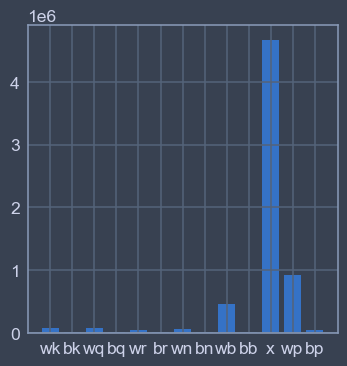

Square e4: [44318, 21791, 51208, 24497, 33278, 27813, 153144, 131857, 79443, 50435, 4285152, 1216072, 380992]


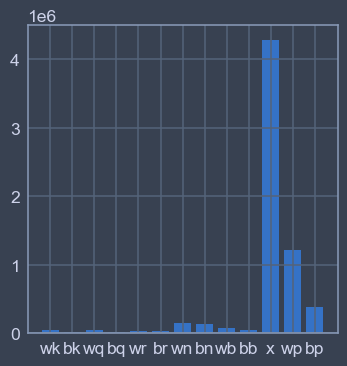

Square e5: [19816, 44562, 27336, 45884, 33169, 31284, 169234, 154641, 56197, 78614, 4126038, 730611, 982614]


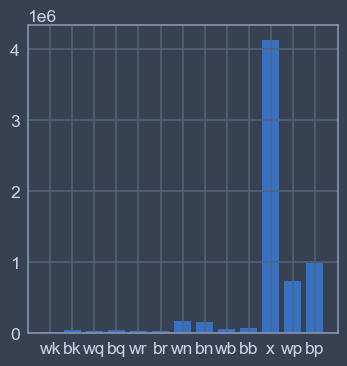

Square e6: [10951, 82096, 24211, 54278, 27954, 43098, 30014, 55752, 26036, 286856, 4099768, 64352, 1694634]


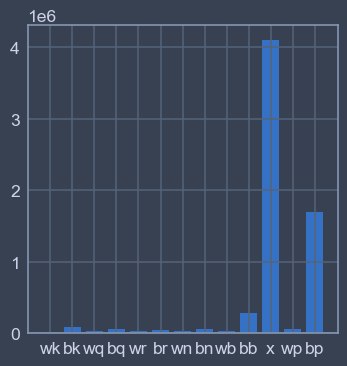

Square e7: [5354, 145946, 14634, 244948, 37617, 77217, 14233, 236058, 13753, 634223, 4483650, 14358, 578009]


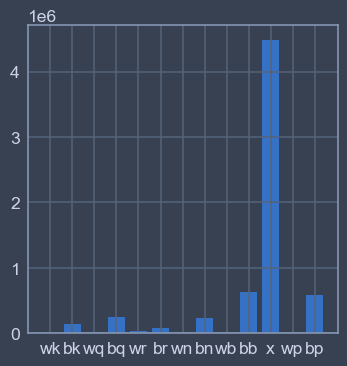

Square e8: [1818, 1088362, 11570, 47338, 19378, 648682, 3279, 49432, 4691, 29770, 4595680, 0, 0]


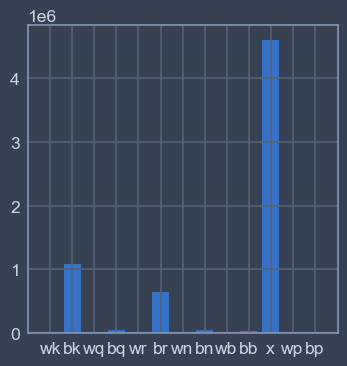

Square f1: [123555, 1963, 19237, 8127, 1582086, 12972, 43807, 3059, 507606, 5364, 4192224, 0, 0]


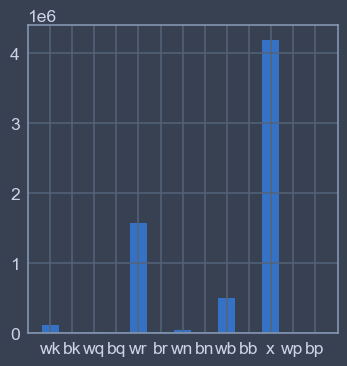

Square f2: [170962, 5821, 57472, 15986, 75067, 28966, 29583, 10656, 57444, 10978, 2998373, 3028427, 10265]


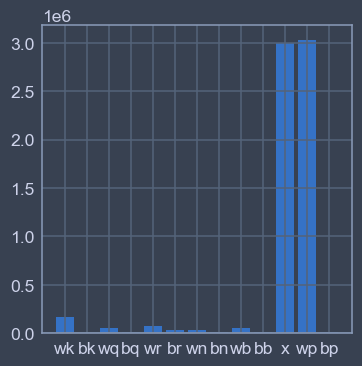

Square f3: [102197, 12052, 151525, 17048, 56421, 20000, 1303159, 18630, 156184, 27475, 3893963, 695460, 45886]


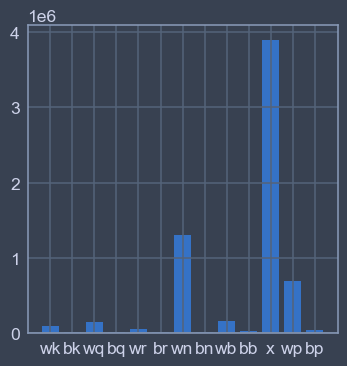

Square f4: [44425, 22485, 42963, 26311, 28840, 24748, 71043, 52661, 227664, 31349, 4883989, 846193, 197329]


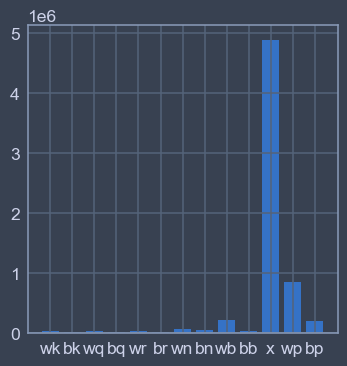

Square f5: [21589, 42993, 25012, 35390, 23395, 31280, 50767, 81811, 32053, 174448, 5054620, 211907, 714735]


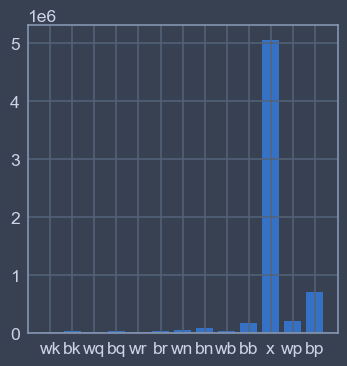

Square f6: [12435, 103799, 21283, 115762, 22457, 48511, 24633, 1267242, 33885, 181770, 3994701, 65241, 608281]


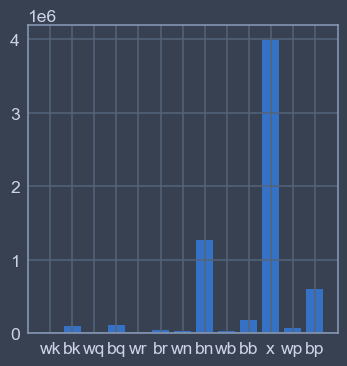

Square f7: [6179, 179910, 19280, 45181, 31190, 76826, 13026, 32063, 12815, 37937, 2636003, 13622, 3395968]


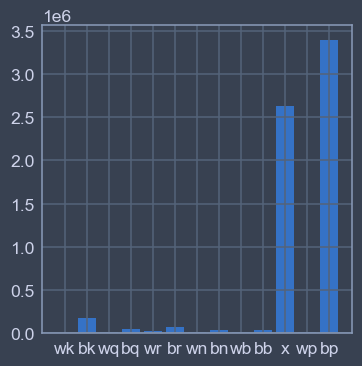

Square f8: [1729, 141389, 8630, 21752, 13024, 1665712, 3705, 52602, 5523, 590827, 3995107, 0, 0]


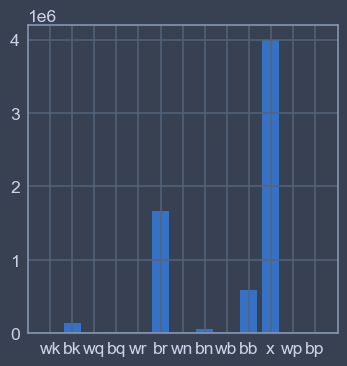

Square g1: [2626696, 1790, 4322, 6867, 120138, 9364, 234927, 758, 8053, 2649, 3484436, 0, 0]


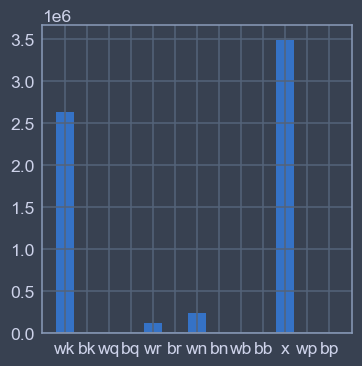

Square g2: [303837, 5744, 25276, 9339, 26716, 22171, 14324, 3922, 706719, 10370, 2271020, 3090058, 10504]


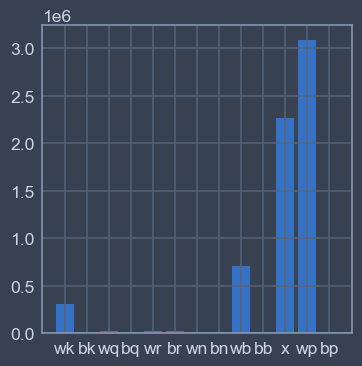

Square g3: [90451, 12457, 67088, 16505, 36086, 14588, 146895, 13414, 132484, 15175, 4396328, 1523385, 35144]


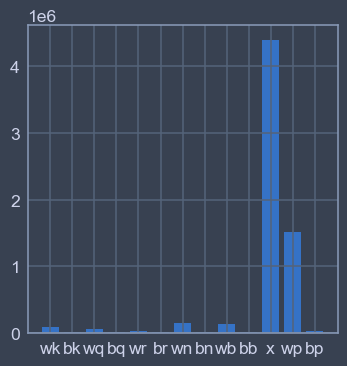

Square g4: [36887, 20242, 54866, 22526, 19120, 16628, 26949, 79460, 28692, 138904, 5420000, 487880, 147846]


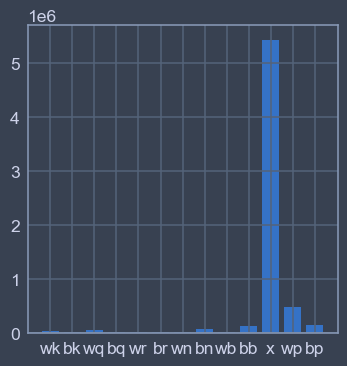

Square g5: [21717, 35780, 28454, 46207, 16895, 17115, 101571, 21300, 187604, 36395, 5362693, 213309, 410960]


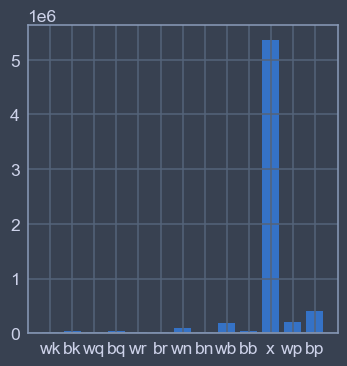

Square g6: [13314, 83164, 19969, 45048, 16288, 28471, 14557, 115082, 20047, 110492, 4013259, 41706, 1978603]


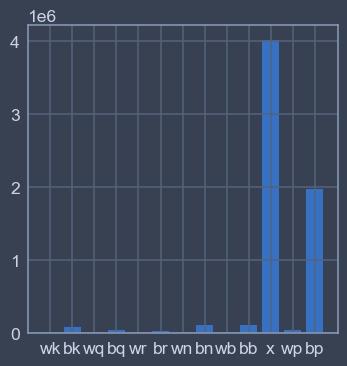

Square g7: [6332, 355638, 11526, 28345, 23111, 29437, 5117, 21584, 12849, 927356, 2322915, 12784, 2743006]


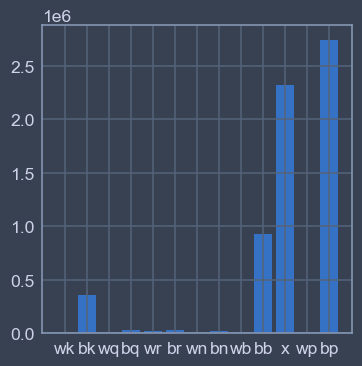

Square g8: [2390, 2569460, 7500, 4708, 9617, 124219, 1045, 279401, 3082, 5330, 3493248, 0, 0]


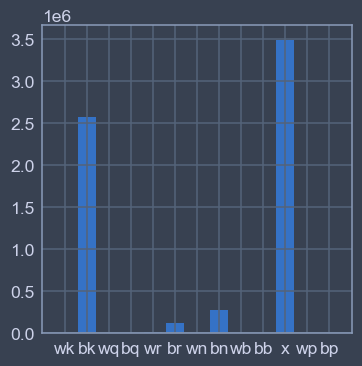

Square h1: [325945, 1411, 2559, 9295, 1260924, 11543, 2747, 1833, 11886, 2399, 4869458, 0, 0]


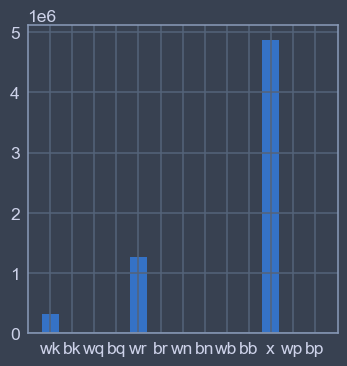

Square h2: [223830, 3382, 7037, 9608, 16174, 23556, 33950, 2668, 34280, 6680, 2968315, 3156463, 14057]


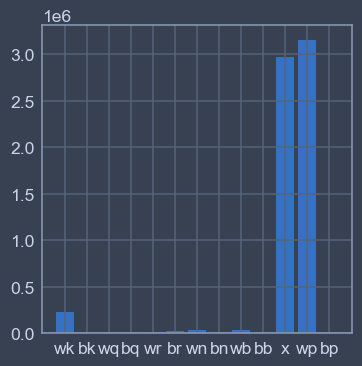

Square h3: [48171, 6290, 27088, 19582, 26466, 15033, 29202, 6431, 39278, 28778, 4841325, 1361884, 50472]


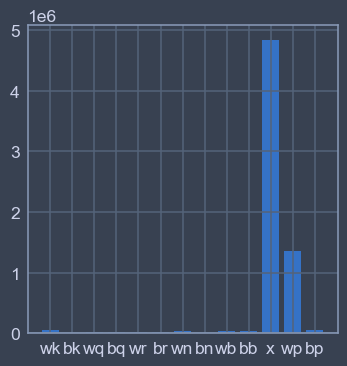

Square h4: [19123, 10609, 37565, 39510, 16710, 15015, 51004, 13754, 56958, 18839, 5541211, 536847, 142855]


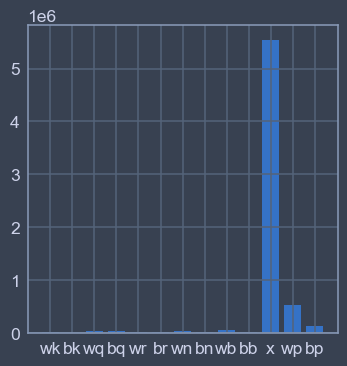

Square h5: [11887, 17516, 45189, 32007, 14967, 15701, 17105, 69420, 16704, 43868, 5527910, 176377, 511349]


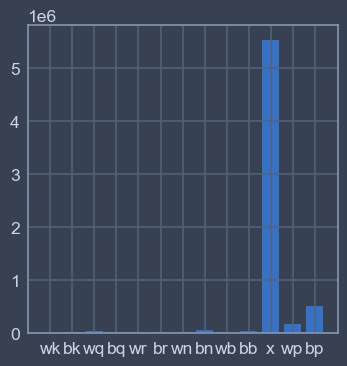

Square h6: [7204, 49680, 29041, 19100, 17280, 18002, 7549, 35129, 44211, 42659, 4997166, 68968, 1164011]


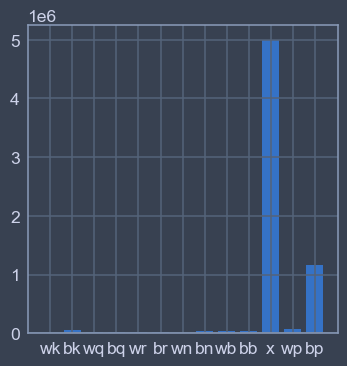

Square h7: [4277, 190523, 14825, 5869, 25821, 15525, 3903, 29777, 9128, 22006, 2768071, 16804, 3393471]


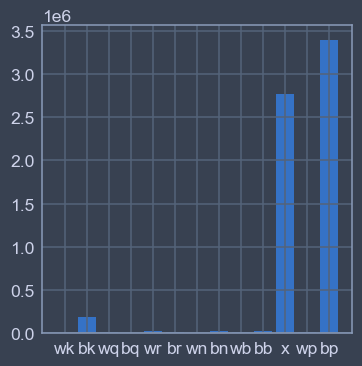

Square h8: [1464, 281903, 11054, 3010, 12251, 1354109, 2617, 2522, 2566, 16765, 4811739, 0, 0]


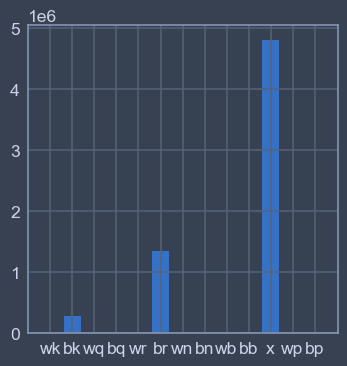

In [19]:
for square in SquareData.squares:
    fig,ax = plt.subplots(figsize=(4,4))
    ax.bar(square_occupant_counts.index, square_occupant_counts[square])
    print(f'Square {square}: {list(square_occupant_counts[square])}')
    plt.show()
    plt.close()